In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_80956533cb', 'id': 'chatcmpl-C9mfQXCOCKzUna59RBSllIVFGVRh3', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c2143ac7-24f6-4eb2-bad8-c1fb6a872b8b-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="gemma2-9b-it")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content="Hey Krish! That's awesome! Cricket is a fantastic sport. 🏏\n\nDo you have a favorite team or player? What position do you like to play?  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 19, 'total_tokens': 58, 'completion_time': 0.070909091, 'prompt_time': 0.00139898, 'queue_time': 0.247391399, 'total_time': 0.072308071}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a5a05c54-adb5-4860-a81c-b15ad0887917-0', usage_metadata={'input_tokens': 19, 'output_tokens': 39, 'total_tokens': 58})

In [7]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

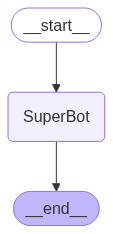

In [8]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='00a26866-63c4-4258-b3c1-35726e535aa9'),
  AIMessage(content="Hi Krish,\n\nIt's nice to meet you! Cricket is a fantastic sport. 🏏\n\nWhat do you like most about cricket? \n\nDo you play it yourself?  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 19, 'total_tokens': 61, 'completion_time': 0.076363636, 'prompt_time': 0.00132192, 'queue_time': 0.24892047, 'total_time': 0.077685556}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--573d81b3-9c4f-40cb-9258-5a3540ad4909-0', usage_metadata={'input_tokens': 19, 'output_tokens': 42, 'total_tokens': 61})]}

In [10]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hello Krish!\n\nIt's great to meet you. Cricket is a fantastic sport! 🏏\n\nWhat do you like most about it?  Do you have a favorite team or player? 😊 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 19, 'total_tokens': 64, 'completion_time': 0.081818182, 'prompt_time': 0.00132204, 'queue_time': 0.248920788, 'total_time': 0.083140222}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d3f006dd-5555-42a5-b85f-b60b95dac1c8-0', usage_metadata={'input_tokens': 19, 'output_tokens': 45, 'total_tokens': 64})]}}


In [11]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='fe47276d-98c6-4441-ac40-7c8aaa8c2d7e'), AIMessage(content="Hello Krish!\n\nIt's great to meet you. Cricket is a fantastic sport! 🏏\n\nWhat do you like most about it?  Do you have a favorite team or player? 😊 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 19, 'total_tokens': 64, 'completion_time': 0.081818182, 'prompt_time': 0.00132204, 'queue_time': 0.248920788, 'total_time': 0.083140222}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d3f006dd-5555-42a5-b85f-b60b95dac1c8-0', usage_metadata={'input_tokens': 19, 'output_tokens': 45, 'total_tokens': 64}), HumanMessage(content='I also like football', additional_kwargs={}, response_metadata={}, id='22489ad0-9d89-4582-904f-f8634bbdd80c')]}
{'messages': [Huma

In [15]:
for chunk in graph_builder.stream({'messages':"I also like ludo along with other games in mentioned "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Ludo is a classic!  It's so much fun to play with friends and family.  🎲\n\nIt sounds like you have a great mix of sports and board games you enjoy.  Do you have a favorite game to play with your friends? 😄 \n\n\n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 346, 'total_tokens': 404, 'completion_time': 0.105454545, 'prompt_time': 0.00790081, 'queue_time': 0.249281177, 'total_time': 0.113355355}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--49d5c754-b4c2-4631-8539-c30930932b32-0', usage_metadata={'input_tokens': 346, 'output_tokens': 58, 'total_tokens': 404})]}}


In [13]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='fe47276d-98c6-4441-ac40-7c8aaa8c2d7e'), AIMessage(content="Hello Krish!\n\nIt's great to meet you. Cricket is a fantastic sport! 🏏\n\nWhat do you like most about it?  Do you have a favorite team or player? 😊 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 19, 'total_tokens': 64, 'completion_time': 0.081818182, 'prompt_time': 0.00132204, 'queue_time': 0.248920788, 'total_time': 0.083140222}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d3f006dd-5555-42a5-b85f-b60b95dac1c8-0', usage_metadata={'input_tokens': 19, 'output_tokens': 45, 'total_tokens': 64}), HumanMessage(content='I also like football', additional_kwargs={}, response_metadata={}, id='22489ad0-9d89-4582-904f-f8634bbdd80c'), AIMessage(content="

In [16]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'd6d005a5-4180-4d4a-a6ef-03ad389028a9', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='fe47276d-98c6-4441-ac40-7c8aaa8c2d7e'), AIMessage(content="Hello Krish!\n\nIt's great to meet you. Cricket is a fantastic sport! 🏏\n\nWhat do you like most about it?  Do you have a favorite team or player? 😊 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 19, 'total_tokens': 64, 'completion_time': 0.081818182, 'prompt_time': 0.00132204, 'queue_time': 0.248920788, 'total_time': 0.083140222}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprob